In [1]:
import pandas as pd

matches_data = pd.read_csv("/content/matches.csv")
deliveries_data = pd.read_csv("/content/deliveries.csv")

# print(matches_data.head(5))
matches_data.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
def calc_count(column_name):
  match_in_city = matches_data[column_name].value_counts()
  return match_in_city


In [15]:
match_in_city = calc_count("city")
match_in_city = match_in_city.reset_index()
match_in_city.columns=["city","match_count"]
match_in_city.head(5)

,city,match_count
0,Mumbai,173
1,Kolkata,93
2,Delhi,90
3,Chennai,85
4,Hyderabad,77


In [30]:
import matplotlib.pyplot as plt
import pdb

def pie_plot(match_data,top_cities):

  columns_header_list = match_data.columns.tolist()
  match_data = match_data.sort_values(by="match_count",ascending =False)
  top_data = match_data.head(top_cities)
  input_data = top_data["match_count"]

  plt.figure(figsize=(12,12))
  # pdb.set_trace()

  # input_data.plot.pie(autopct ="%1.1f%%",startangle=140,cmap ="virdis",explode=[0.05]*len(input_data),labels =top_data[columns_header_list][0])
  input_data.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis', explode=[0.05] * len(input_data),labels=top_data[columns_header_list[0]])

  plt.title("total Matchs held in Each state",fontsize =14)
  plt.ylabel("")
  plt.show()

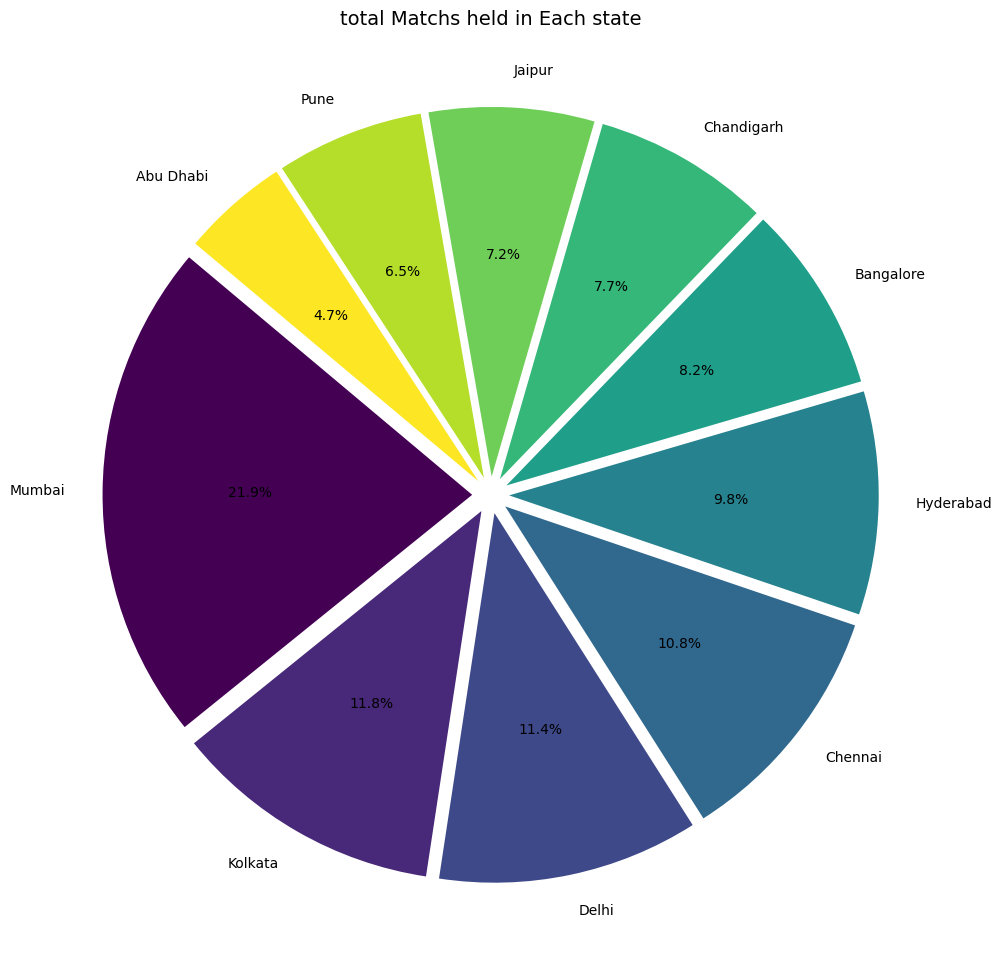

In [32]:

pie_plot(match_in_city,10)

In [36]:
win_data = matches_data[matches_data["winner"].notna()]

wins_per_team_at_venue = win_data.groupby(["venue","winner"]).size().reset_index(name="Wins")

wins_per_team_at_venue.head(5)

,venue,winner,Wins
0,Arun Jaitley Stadium,Chennai Super Kings,1
1,Arun Jaitley Stadium,Delhi Capitals,4
2,Arun Jaitley Stadium,Delhi Daredevils,4
3,Arun Jaitley Stadium,Kings XI Punjab,1
4,Arun Jaitley Stadium,Mumbai Indians,1


In [39]:
def most_wins_at_venue(matche_data,venue_name):
  venue_ = matche_data[matche_data["venue"]==venue_name]
  most_wins_team = venue_.loc[venue_["Wins"].idxmax()]
  return most_wins_team["winner"], most_wins_team["Wins"]


In [43]:
# venue_name = "Arun Jaitley Stadium"
venue_name ="Zayed Cricket Stadium, Abu Dhabi"
team , wins = most_wins_at_venue(wins_per_team_at_venue, venue_name)
print(team , wins )
# wins_per_team_at_venue

Kolkata Knight Riders 2


In [44]:
def bar_plot(match_data, venue_name):
  venue_ = match_data[match_data["venue"] == venue_name]
  team_wins = venue_.groupby("winner")["Wins"].sum().sort_values(ascending=False)

  plt.figure(figsize=(10,6))
  team_wins.plot(kind ='bar',color="skyblue")
  plt.title(f"number of wins for Each team at {venue_name}",fontsize =14)
  plt.xlabel("Team",fontsize =12)
  plt.ylabel("Number od wins",fontsize =12)
  plt.xticks(rotation=45,ha="right")
  plt.tight_layout()
  plt.show()



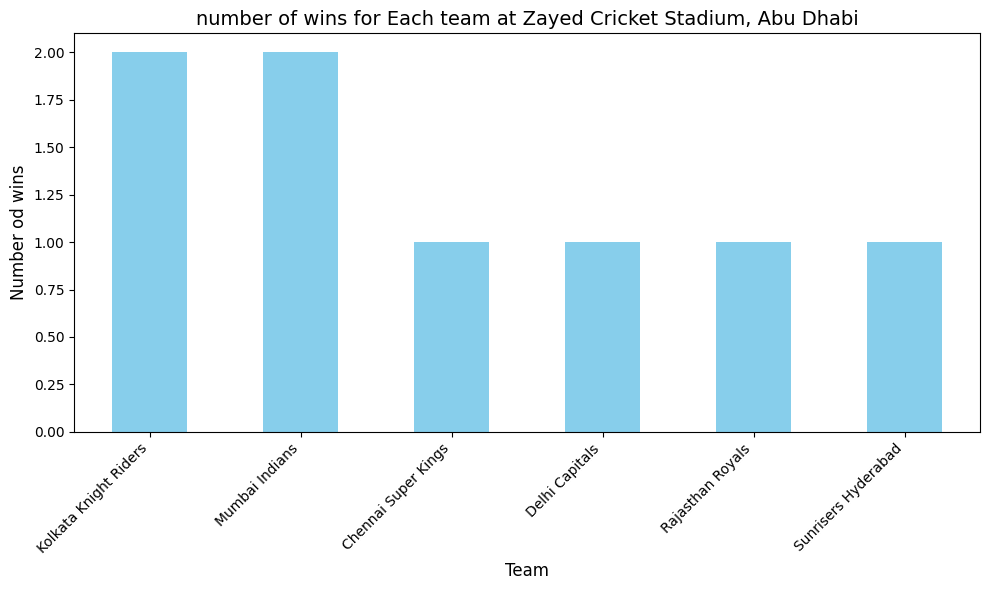

In [45]:
bar_plot(wins_per_team_at_venue,venue_name )